In [1]:
from src.models.double_modulated_siren import DoubleModulatedSirenModel
from src.datasets.chairs import get_mgrid
import torch

/home/arkadi.piven/miniconda3/envs/gip_med_wsi_env/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from src.models.modulated_siren import ModulatedSirenModel
import pytorch_lightning as pl

# Create an instance of the ModulatedSirenModel
model = DoubleModulatedSirenModel(in_features=2, hidden_features=256, hidden_layers=10, modulation_size=256, out_features=3, outermost_linear=True, first_omega_0=30, hidden_omega_0=30.)
idx = 0
dim = 128
representation_dim = 512
modulation_size = 128
hidden_features = 256
hidden_layers = 20
# Load the checkpoint
checkpoint_path = "/home/arkadi.piven/Code/functa/checkpoints/meta_learning_canonical_chairs_two_angle_hidden_layers_20_modsize_128_dim_128_multistep_lr_3e-6_hidden_features_256/last.ckpt"
model = model.load_from_checkpoint(checkpoint_path, in_features=2, hidden_features=hidden_features, hidden_layers=hidden_layers, modulation_size=modulation_size, out_features=3, outermost_linear=True, first_omega_0=30, hidden_omega_0=30.)

Chairs dataset initialized
['292621234cdb42969c76680ce8100088', '768843209e734d569d1b527c1f3511a1', '66624c84a4d94559b35914ee2ada4c4b', 'a9328e057fe049ff8b0c35489e0dfb8d', '607a3bf3fbc54bd2b9da08c18f625ee4', '4c302192035d40e59b7c0f18bb74f212', 'd2d5000b1e7a4d9a8a4a637267418061', '0f7366550f694e1cb9efddea214a3c33', '9f7890238c4442d789d1970cead93203', '9d53c4f8a4394a9ca333da20138cd897', '79c0f5d111324264b4c6fea9402df88e', '64b170e4864549c382b6c94c529203d7', '2820827abdcd4e79b7c67683292416aa', '934b7b5515da4720b0af2764924aad3a', '053039b95c314104b5fe0dfb19f43cb3', '43c8828e83124e1e90e85c9e57b404c8', '2ec01ec1eb874f6fb11ef732fb575267', '392e2810e1e24b02b2fdbc1dd3f21064', 'fab9443d48e24fbfa309187df78d58e6', 'b10ee58a01b649d381598d899850176c', '15b2ebce6f084c3ea8d582c168ff478e', 'ddd35916c5d84fd8ab4c38380a73fb5b', '28d004c0d320423d89b6b4421c23df2f', '75b13759a6e84978b41cb52073031326', 'f7b5e38a9a6c4fb2b445396c6bfc6368', '8102032a85e34e1d9e9193e6149946f1', '8505977020be4fd194854ad3d9808222', 

/home/arkadi.piven/miniconda3/envs/gip_med_wsi_env/lib/python3.10/site-packages/torch/functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  /opt/conda/conda-bld/pytorch_1659484803030/work/aten/src/ATen/native/TensorShape.cpp:2894.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


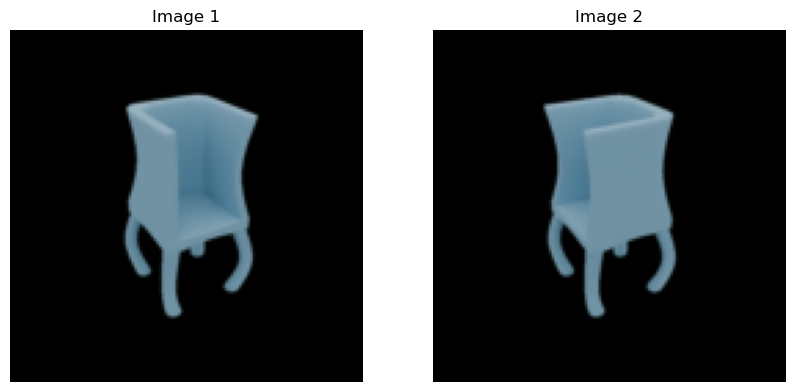

In [3]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from src.datamodules.chairs_datamodule import ChairsDatamodule
import torchvision. transforms as T
from PIL import Image

# Define the grid
chairs = ChairsDatamodule(path="/home/arkadi.piven/Code/functa/rendered/chair", dim=dim, batch_size=1, double=True)
transform = T.ToPILImage()
coords_1, pixels_1, coords_2, pixels_2 = chairs.train_dataset[idx]
coords = get_mgrid(representation_dim, 2)
pixels_1 = pixels_1 * 0.5 + 0.5
pixels_2 = pixels_2 * 0.5 + 0.5
# # Pass the coordinates through the model
model.phi.data = torch.zeros(modulation_size)
output_1, output_2 = model([coords_1, coords_2])
output_1 = output_1 * 0.5 + 0.5
output_2 = output_2 * 0.5 + 0.5

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Display the images
axs[0].imshow(pixels_1.view(dim, dim, 3).detach().numpy())
axs[0].set_title('Image 1')
axs[0].axis('off')

axs[1].imshow(pixels_2.view(dim, dim, 3).detach().numpy())
axs[1].set_title('Image 2')
axs[1].axis('off')

plt.show()

# plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


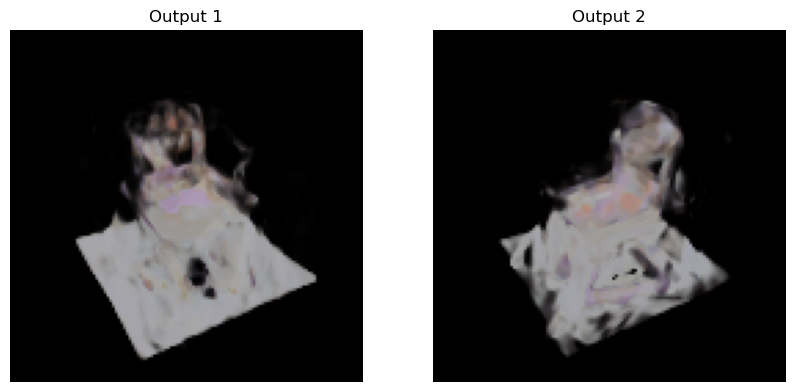

In [4]:
# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Display the images
axs[0].imshow(output_1.view(dim, dim, 3).detach().numpy())
axs[0].set_title('Output 1')
axs[0].axis('off')

axs[1].imshow(output_2.view(dim, dim, 3).detach().numpy())
axs[1].set_title('Output 2')
axs[1].axis('off')

plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


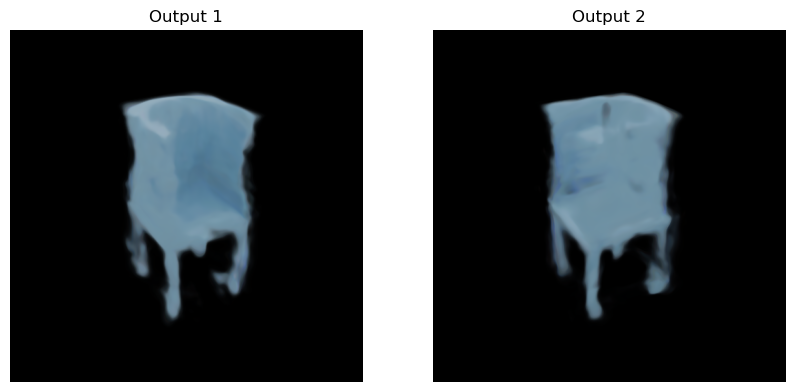

In [5]:
batch = chairs.train_dataset[idx]

model.train_latent(batch)

coords = get_mgrid(representation_dim, 2)
output_1, output_2 = model([coords, coords])
output_1, output_2 = output_1 * 0.5 + 0.5, output_2 * 0.5 + 0.5

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Display the images
axs[0].imshow(output_1.view(representation_dim, representation_dim, 3).detach().numpy())
axs[0].set_title('Output 1')
axs[0].axis('off')

axs[1].imshow(output_2.view(representation_dim, representation_dim, 3).detach().numpy())
axs[1].set_title('Output 2')
axs[1].axis('off')

plt.show()